# Income Metrics Comparison

In [29]:
# enable reload

%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import pandas as pd
import numpy as np
import pathlib as pl

from compute_metrics import mean_income, median_income,p90_income,weighted_average_income_by_city_country
from plot_metrics import plot_metric_comparison, plot_metric_trends_by_country

In [31]:
data_path          = ('../../../data/ds/sample_income_data_2022_2025.csv')
sample_income_data = pd.read_csv(data_path)

sample_income_data.head()

,country,city,income,year
0,USA,New York,85000,2022
1,USA,Los Angeles,72000,2022
2,USA,Chicago,66000,2022
3,USA,San Francisco,115000,2022
4,Canada,Toronto,67000,2022


In [32]:
methods = {
    'mean': mean_income,
    'median': median_income,
    'p90': p90_income,
    'weighted_average_income_by_city_country': weighted_average_income_by_city_country,
}


## Computing per year and country

In [33]:
import pandas as pd

results = []

for (country, year), df_group in sample_income_data.groupby(['country', 'year']):
    for method_name, method_func in methods.items():
        if method_name == 'weighted_average':
            value = method_func(df_group, weight_col='weight')  # Use if you have weights
        else:
            value = method_func(df_group)
        results.append({
            'country': country,
            'year': year,
            'method': method_name,
            'value': value
        })

results_df = pd.DataFrame(results)


In [34]:
results_df

,country,year,method,value
0,Canada,2022,mean,66250.000000
1,Canada,2022,median,65000.000000
2,Canada,2022,p90,74000.000000
3,Canada,2022,weighted_average_income_by_city_country,66984.905660
4,Canada,2023,mean,67250.000000
...,...,...,...,...
75,USA,2024,weighted_average_income_by_city_country,92773.371105
76,USA,2025,mean,91250.000000
77,USA,2025,median,85000.000000
78,USA,2025,p90,115400.000000


## Plot only 2025

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns




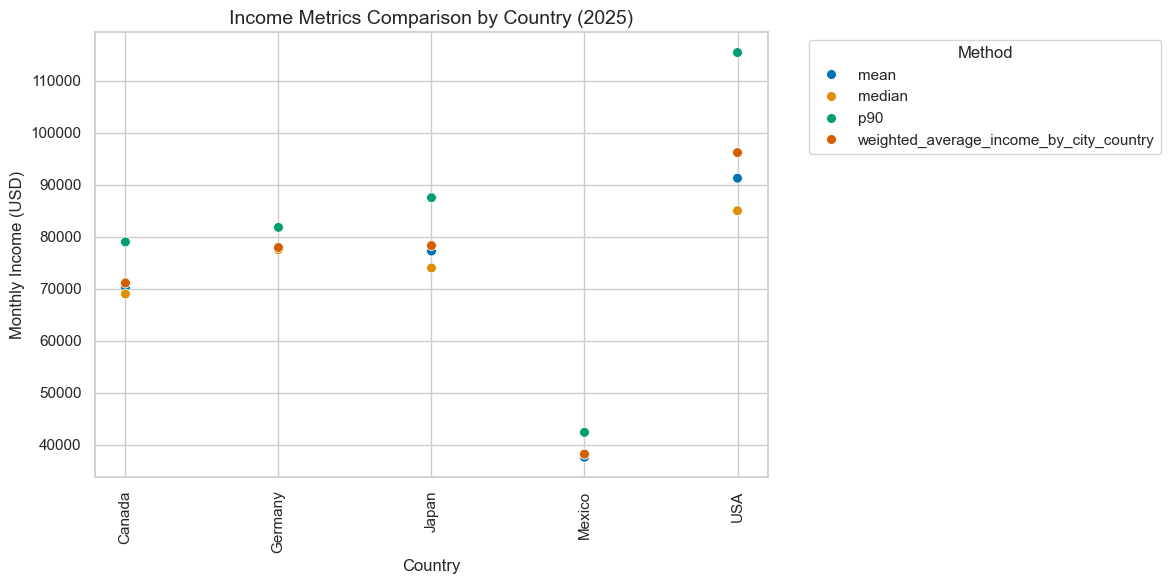

In [36]:
plot_metric_comparison(
    df=results_df[results_df['year'] ==2025],
    x="country",
    y="value",
    hue="method",
    title="Income Metrics Comparison by Country (2025)",
    y_label="Monthly Income (USD)"
)


## Plot multiple years

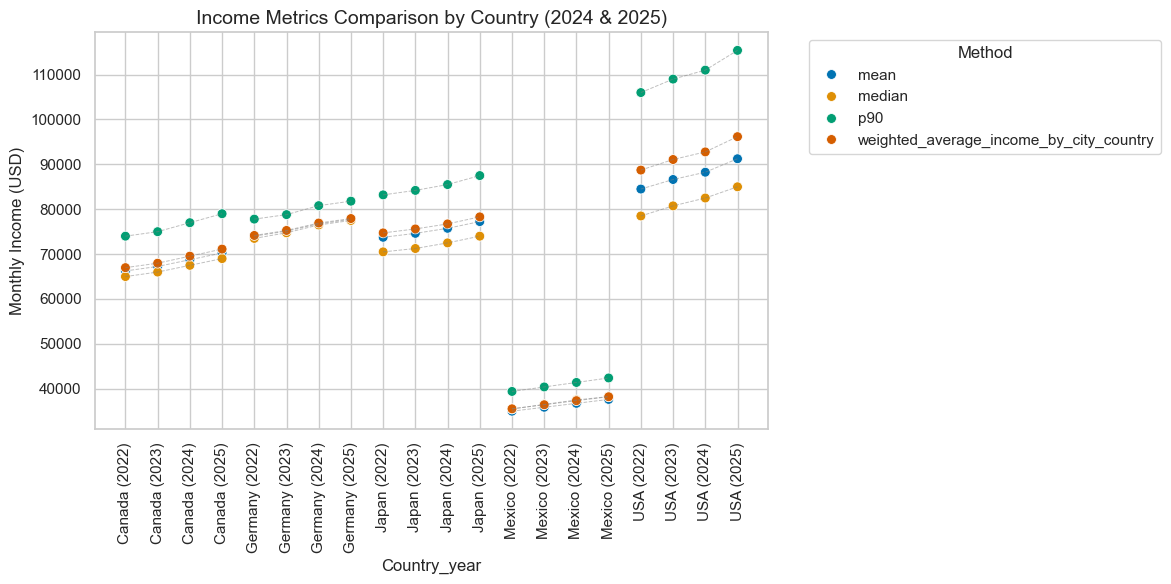

In [ ]:
results_df['country_year'] = results_df['country'] + ' (' + results_df['year'].astype(str) + ')'

plot_metric_comparison(
    df=results_df,
    x="country_year",
    y="value",
    hue="method",
    title="Income Metrics Comparison by Country (2024 & 2025)",
    y_label="Monthly Income (USD)"
)


## One plot per country

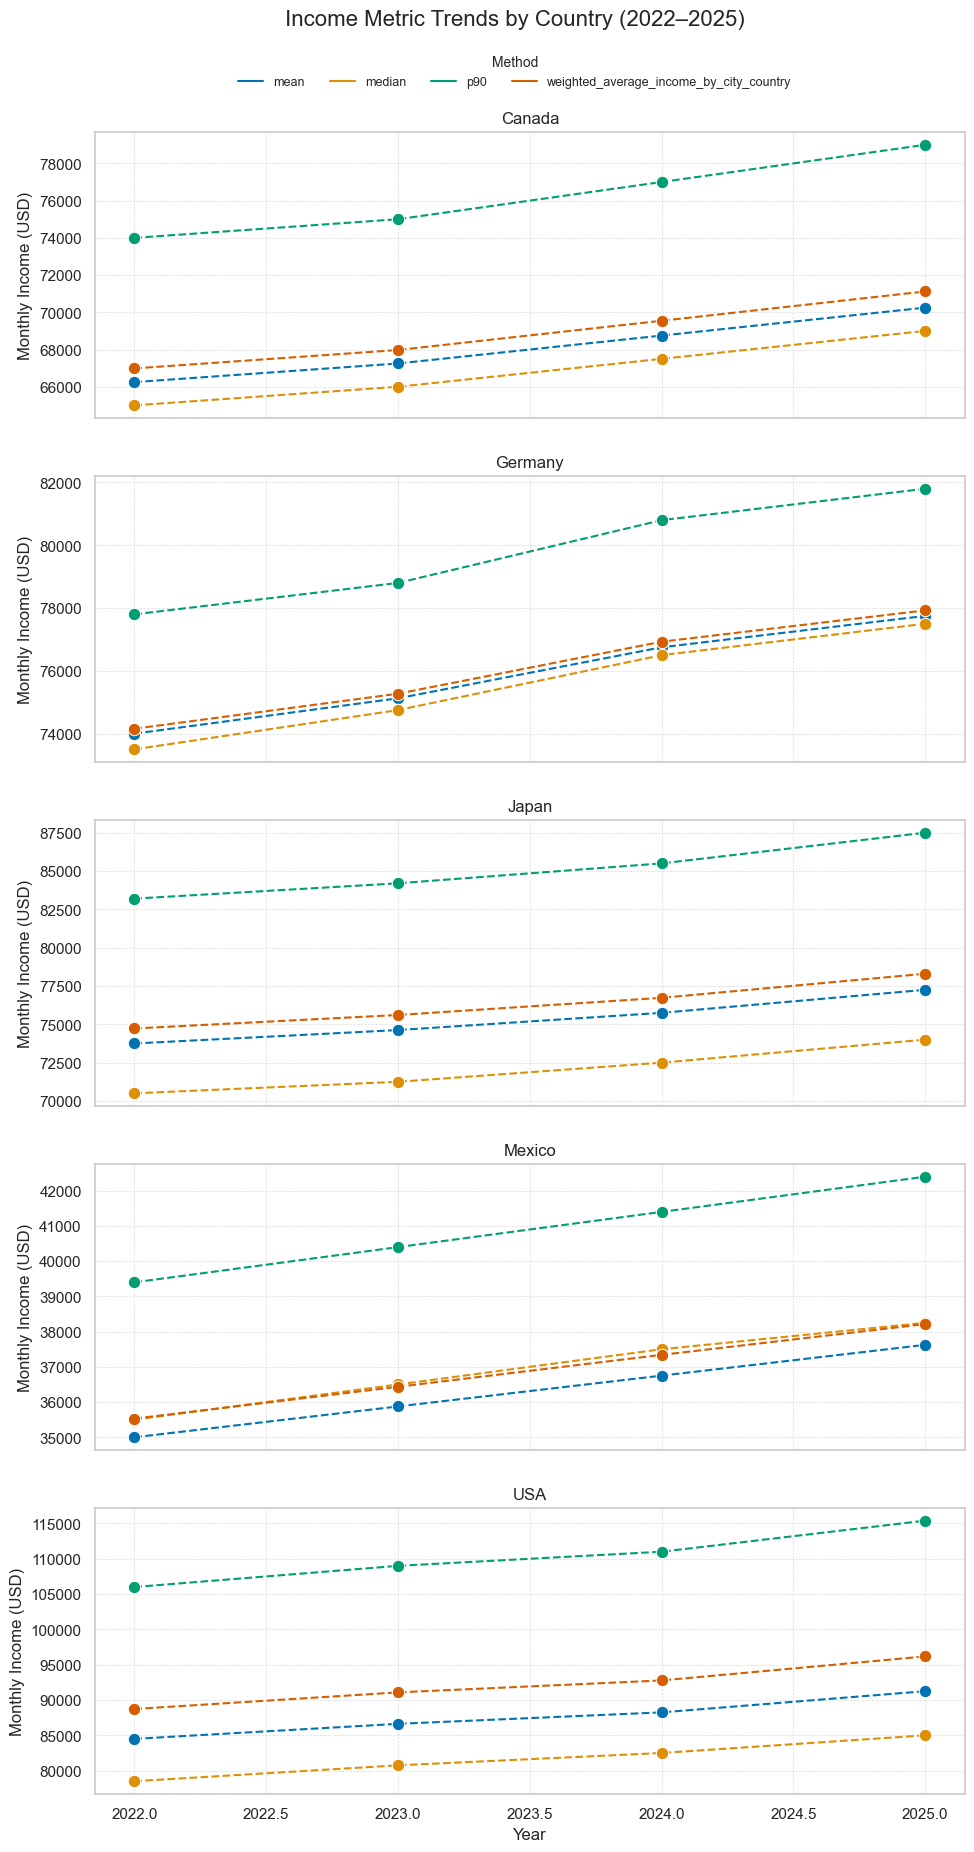

In [40]:
from plot_metrics import plot_metric_trends_by_country

plot_metric_trends_by_country(
    df=results_df,
    y_label="Monthly Income (USD)",
    title="Income Metric Trends by Country (2022–2025)"
)
